# Simultaneously fit multiple lightcurves 

Here we will fit multiple lightcurves simultaneously using the global fitter in exotic. We will set up bounds for each lightcurve that specify what parameters to fit along with 'global' bounds that are shared between all lightcurves. 

![](https://s3.amazonaws.com/aasie/images/0004-6256/164/5/null/ajac8deef3_hr.jpg)

This notebook will show you how to reproduce something similar to Figure 4 in a study on HD 80606 b, https://ui.adsabs.harvard.edu/abs/2022AJ....164..178P/abstract 

Please cite that paper if you use this code

## Find lightcurve data in the Exoplanet Watch Database

The command `get` will fetch priors, light curves and an ephemeris (O-C) for each target.

In [1]:
from exotic.api.ew import ExoplanetWatch
from IPython.display import display, Image

# This will load the results JSON from the link above
EW = ExoplanetWatch()
print(EW.target_list)

# names are case and space sensitive
result = EW.get('WASP-1 b')

# list the result properties
result.__dict__.keys()

Loaded 278 targets
['CoRoT-11 b', 'CoRoT-14 b', 'CoRoT-18 b', 'CoRoT-1 b', 'CoRoT-27 b', 'CoRoT-29 b', 'CoRoT-2 b', 'CoRoT-7 b', 'CoRoT-8 b', 'CoRoTID 223977153 b', 'EPIC 206042996 c', 'Gaia-1 b', 'Gaia-2 b', 'GJ 1214 b', 'GJ 3470 b', 'GJ 436 b', 'GPX-1 b', 'HAT-P-11 b', 'HAT-P-12 b', 'HAT-P-13 b', 'HAT-P-16 b', 'HAT-P-17 b', 'HAT-P-18 b', 'HAT-P-19 b', 'HAT-P-1 b', 'HAT-P-20 b', 'HAT-P-21 b', 'HAT-P-22 b', 'HAT-P-23 b', 'HAT-P-25 b', 'HAT-P-26 b', 'HAT-P-27 b', 'HAT-P-28 b', 'HAT-P-29 b', 'HAT-P-30 b', 'HAT-P-32 b', 'HAT-P-33 b', 'HAT-P-36 b', 'HAT-P-37 b', 'HAT-P-39 b', 'HAT-P-3 b', 'HAT-P-41 b', 'HAT-P-44 b', 'HAT-P-45 b', 'HAT-P-49 b', 'HAT-P-4 b', 'HAT-P-51 b', 'HAT-P-52 b', 'HAT-P-53 b', 'HAT-P-54 b', 'HAT-P-55 b', 'HAT-P-56 b', 'HAT-P-57 b', 'HAT-P-59 b', 'HAT-P-5 b', 'HAT-P-68 b', 'HAT-P-6 b', 'HAT-P-70 b', 'HAT-P-7 b', 'HAT-P-8 b', 'HAT-P-9 b', 'HATS-18 b', 'HATS-24 b', 'HATS-33 b', 'HD 149026 b', 'HD 189733 b', 'HD 209458 b', 'HD 80606 b', 'K2-117 b', 'K2-123 b', 'K2-127 b', 

dict_keys(['raw_result', 'host', 'name', 'priors', 'timestamp', 'identifier', 'reduction_count', 'observation_count', 'ephemeris', 'observations'])

## Priors
A list of stellar and planetary parameters with references. These are used to calculate a light curve model with non-linear limb darkening.

In [2]:
result.priors

{'R*': {'units': 'Sol',
  'value': '1.52',
  'reference': 'Kokori%20et%20al.%202022',
  'uncertainty': '0.05'},
 'RA': {'units': 'decimal',
  'value': '5.1669536',
  'reference': None,
  'uncertainty': None},
 'Rp': {'units': 'R_Earth',
  'value': '17.7',
  'reference': 'ExoFOP-TESS%20TOI',
  'uncertainty': '0.9'},
 'T*': {'units': 'K',
  'value': '6116.0',
  'reference': 'ExoFOP-TESS%20TOI',
  'uncertainty': '106.58'},
 'Tc': {'units': 'BJD-TDB',
  'value': '2456543.33866',
  'reference': 'Ivshina%20&amp;%20Winn%202022',
  'uncertainty': '0.00028'},
 'DEC': {'units': 'decimal',
  'value': '31.9899732',
  'reference': None,
  'uncertainty': None},
 'Tcs': [{'units': 'BJD, BJD-TDB, HJD',
   'value': '2453912.5147133335',
   'reference': 'Turner%20et%20al.%202016,%20Maciejewski%20et%20al.%202014,%20Collier%20Cameron%20et%20al.%202007',
   'uncertainty': '0.00054'},
  {'units': 'HJD-UTC',
   'value': '2454461.86099',
   'reference': 'Simpson%20et%20al.%202011',
   'uncertainty': '0.00024'

In [3]:
result.ephemeris.keys()

dict_keys(['Tc', 'Tcs', 'files', 'notes', 'Period', 'Tc_err', 'epochs', 'Tcs_err', 'datasets', 'nea_tmids', 'residuals', 'timesaved', 'Period_err', 'nea_epochs', 'nea_tmids_err', 'nea_references', 'ephemeris_url'])

## Observations
A list of observations for each target. These are used to fit the light curve model to the data.

In [4]:
len(result.observations)

18

In [5]:
# list the properties
print(result.observations[0].__dict__.keys())

dict_keys(['raw_observation', 'name', 'files', 'filter', 'obscode', 'identifier', 'secondary_obscodes', 'errors', 'parameters', 'lightcurve_url', 'posterior_url'])


In [6]:
# print the best-fit parameters
result.observations[0].parameters

{'u0': 1.8275705061936063,
 'u1': -3.2844787398267963,
 'u2': 3.938674827919378,
 'u3': -1.4817665942861882,
 'ecc': 0.013,
 'inc': 90.0,
 'omega': 91.1,
 'duration': 0.1551,
 'tmid': 2455895.714,
 'a1': 1.1573,
 'a2': -0.134,
 'ars': 5.708,
 'rprs': 0.109,
 'per': 2.51994639}

In [7]:
# show the light curve
for i in range(len(result.observations)):
    display(Image(url=result.observations[i].lightcurve_url))

# Download the light curve data

In [8]:
time, flux, fluxerr, airmass, airmasscorr = result.observations[0].get_data()

Text(0, 0.5, 'Rel. Flux')

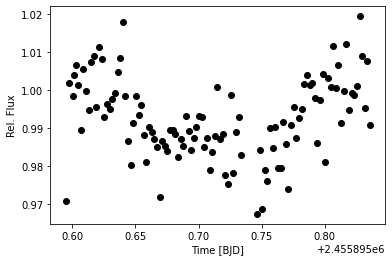

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(time, flux/airmasscorr, 'ko')
plt.xlabel("Time [BJD]")
plt.ylabel("Rel. Flux")

    Done!
Checking exotethys database...
Checking ephemerides database...
Checking photometry database...
Checking catalogues database...
    Done!
    Done!
	Updating:  ecc_planets.yaml
    Done!
	Updating:  ecc_stars.yaml
    Done!


Text(0, 0.5, 'Rel. Flux')

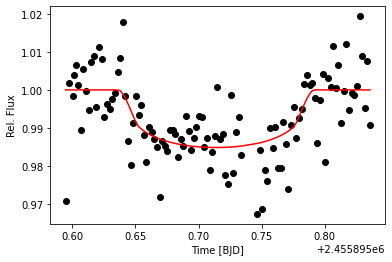

In [10]:
# let's over plot the transit model too
from exotic.api.elca import transit

plt.plot(time, flux/airmasscorr, 'ko')
plt.plot(time, transit(time, result.observations[0].parameters), 'r-')
plt.xlabel("Time [BJD]")
plt.ylabel("Rel. Flux")

In [11]:
# Fit a single lightcurve using EXOTIC
from exotic.api.elca import lc_fitter

# only define bounds for the "free" parameters during fitting
mybounds = {
    # [lower, upper]
    'rprs':[0,0.2],
    'tmid':[ result.ephemeris['Tc']-0.02,
             result.ephemeris['Tc']+0.02],
    'a2':[-0.5,0.5] # airmass curvature
}

myfit = lc_fitter(time, flux, fluxerr, airmass,
                  result.observations[0].parameters, # priors
                  mybounds, mode='ns' )  # ns = nested sampling, slow but robust + posteriors
                                         # lm = levenberg mardquart, fast but no uncertainties

[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-5e+01   [-45.5932..-45.5932]*| it/evals=5440/10818 eff=52.2173% N=400   0  0 
[ultranest] Likelihood function evaluations: 10869
[ultranest]   logZ = -54.62 +- 0.07752
[ultranest] Effective samples strategy satisfied (ESS = 2047.0, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.08 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.08, need <0.5)
[ultranest]   logZ error budget: single: 0.14 bs:0.08 tail:0.01 total:0.08 required:<0.50
[ultranest] done iterating.


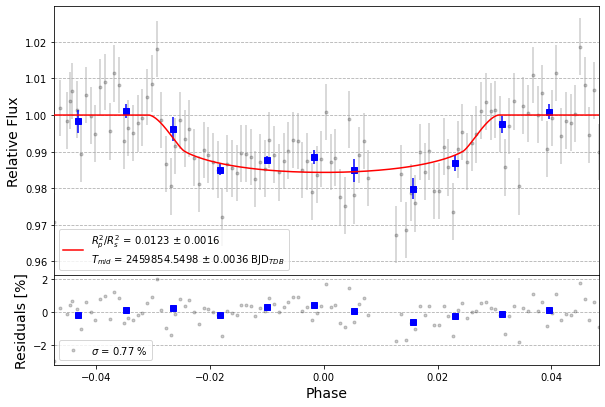

In [12]:
myfit.plot_bestfit()
plt.show()

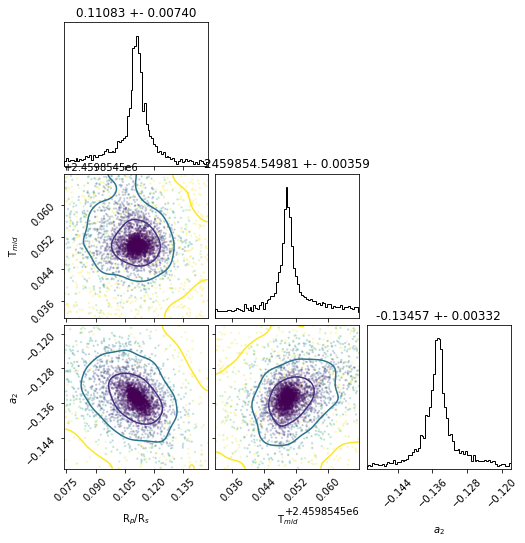

In [13]:
myfit.plot_triangle()
plt.show()

# Fit multiple light curves

After each light curve is fit, the mid-transit times are used along with values from the NASA Exoplanet Archive to derive a phase-folded fit with every dataset

In [14]:
from astropy.time import Time

# prep data for global fitter
input_data = []

# free parameters for each light curve
local_bounds = []

# copy default priors
prior = result.observations[0].parameters.copy()

# aavso files on EW
for n,obs in enumerate(result.observations):

    try:
        time, flux, fluxerr, airmass, airmasscorr = obs.get_data()
    except:
        time, flux, fluxerr, airmass = obs.get_data()

    # ignore noisy data
    if np.std(flux) > 0.03:
        continue
    else:

        # add data to list
        input_data.append({
            'time':time,
            'flux':flux,
            'ferr':fluxerr,
            'airmass':airmass,
            'priors':prior.copy(),
            'name':f"{obs.obscode['id']}"
        })

        # set parameters to ephemeris
        input_data[-1]['priors']['per'] = result.ephemeris['Period']
        input_data[-1]['priors']['tmid'] = result.ephemeris['Tc']

    # add parameter for individual airmass detrending
    local_bounds.append({'a2':(-0.75,0.75)}) 
    # bounds will get overwritten by setting "individual_fit" flag in global fitter

    # print some timing info
    mint = Time(input_data[-1]['time'].min(),format='jd').isot
    maxt = Time(input_data[-1]['time'].max(),format='jd').isot
    maxphase = (input_data[-1]['time'].max() - prior['tmid'])/prior['per']
    minphase = (input_data[-1]['time'].min() - prior['tmid'])/prior['per']
    print(f"{input_data[-1]['name']} {len(input_data)} : {mint} ({minphase:.4f}) - {maxt} ({maxphase:.4f})")

NANF 1 : 2012-12-12T02:10:49.860 (-1421.0454) - 2012-12-12T07:53:12.775 (-1420.9510)
GELD 2 : 2012-12-17T03:01:54.006 (-1419.0471) - 2012-12-17T06:34:38.636 (-1418.9885)
FMAA 3 : 2013-10-23T01:58:05.470 (-1296.0462) - 2013-10-23T07:45:02.729 (-1295.9506)
FMAA 4 : 2013-10-28T02:44:57.399 (-1294.0492) - 2013-10-28T08:41:52.907 (-1293.9508)
NKED 5 : 2013-12-20T01:16:22.881 (-1273.0414) - 2013-12-20T06:40:19.617 (-1272.9521)
FGIC 6 : 2014-09-23T06:20:53.656 (-1163.0345) - 2014-09-23T11:26:54.743 (-1162.9501)
FTAC 7 : 2014-11-10T02:44:22.797 (-1144.0461) - 2014-11-10T08:23:14.119 (-1143.9527)
LGEC 8 : 2016-08-11T06:35:40.478 (-890.0087) - 2016-08-11T10:02:41.070 (-889.9517)
LPAC 9 : 2017-09-05T08:26:12.807 (-735.2131) - 2017-09-05T09:19:20.967 (-735.1984)
FMAA 10 : 2017-10-16T02:12:15.185 (-719.0459) - 2017-10-16T07:57:14.374 (-718.9509)
NKED 11 : 2017-10-21T03:07:19.347 (-717.0466) - 2017-10-21T08:54:09.355 (-716.9510)
MWAA 12 : 2017-12-08T00:38:39.840 (-698.0395) - 2017-12-08T04:57:12.960

In [15]:
from exotic.api.elca import glc_fitter

# bounds shared by all light curves
global_bounds = {
    'rprs':(prior['rprs']*0.75, prior['rprs']*1.33),
    'inc':(prior['inc']-3, min(90,prior['inc']+3)),
    'per':( result.ephemeris['Period']-0.001, 
            result.ephemeris['Period']+0.001),
    'tmid':( result.ephemeris['Tc']-0.02,
             result.ephemeris['Tc']+0.02),
}

myfit = glc_fitter(input_data, global_bounds, local_bounds, individual_fit=True, verbose=True)

Fitting individual light curve 1/14
[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-4e+01   [-35.9706..-35.9706]*| it/evals=5280/10338 eff=53.1294% N=400   0  0 
[ultranest] Likelihood function evaluations: 10393
[ultranest]   logZ = -44.51 +- 0.09067
[ultranest] Effective samples strategy satisfied (ESS = 2122.9, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.09 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.09, need <0.5)
[ultranest]   logZ error budget: single: 0.13 bs:0.09 tail:0.01 total:0.09 required:<0.50
[ultranest] done iterating.
NANF & 2456273.59085486 & 2456273.82862008 & 0.012537821624658461 & 113
Fitting individual light curve 2/14
[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-4e+01   [-43.6503..-43.6497]*| it/evals=5130/9942 eff=53.7623% N=400    0  0 
[ultranest] Likelihood function evaluations: 9975
[ultranest]   logZ = -51.85 +- 0.07651
[ultranest] Effective samples strategy satisfied (ESS = 1992.9, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.45+-0.08 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.08, need <0.5)
[ultranest]   logZ error budget: single: 0.13 bs:0.08 tail:0.01 total:0.08 required:<0.50
[ultranest] done iterating.
GELD & 2456278.62631951 & 2456278.77405829 & 0.006217310281758198 & 70
Fitting individual light curve 3/14
[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-6e+01   [-55.3750..-55.3748]*| it/evals=5130/9109 eff=58.9046% N=400 0  0  0 
[ultranest] Likelihood function evaluations: 9137
[ultranest]   logZ = -63.6 +- 0.0888
[ultranest] Effective samples strategy satisfied (ESS = 1851.3, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.45+-0.07 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.09, need <0.5)
[ultranest]   logZ error budget: single: 0.13 bs:0.09 tail:0.01 total:0.09 required:<0.50
[ultranest] done iterating.
FMAA & 2456588.58200776 & 2456588.82294825 & 0.004358390982033854 & 115
Fitting individual light curve 4/14
[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-6e+01   [-57.5089..-57.5086]*| it/evals=4800/9433 eff=53.1385% N=400      
[ultranest] Likelihood function evaluations: 9471
[ultranest]   logZ = -64.9 +- 0.1054
[ultranest] Effective samples strategy satisfied (ESS = 1732.4, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.45+-0.06 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.11, need <0.5)
[ultranest]   logZ error budget: single: 0.12 bs:0.11 tail:0.01 total:0.11 required:<0.50
[ultranest] done iterating.
FMAA & 2456593.61455323 & 2456593.86241791 & 0.0045599616280304145 & 118
Fitting individual light curve 5/14
[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-3e+01   [-26.6297..-26.6296]*| it/evals=4600/8000 eff=60.5263% N=400  0 0   
[ultranest] Likelihood function evaluations: 8032
[ultranest]   logZ = -33.58 +- 0.09018
[ultranest] Effective samples strategy satisfied (ESS = 1963.6, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.45+-0.04 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.09, need <0.5)
[ultranest]   logZ error budget: single: 0.12 bs:0.09 tail:0.01 total:0.09 required:<0.50
[ultranest] done iterating.
NKED & 2456646.5530426 & 2456646.77800483 & 0.008890609704082881 & 107
Fitting individual light curve 6/14
[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-3e+01   [-29.8876..-29.8876]*| it/evals=4640/8879 eff=54.7234% N=400      
[ultranest] Likelihood function evaluations: 8901
[ultranest]   logZ = -36.88 +- 0.082
[ultranest] Effective samples strategy satisfied (ESS = 1879.5, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.45+-0.06 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.08, need <0.5)
[ultranest]   logZ error budget: single: 0.12 bs:0.08 tail:0.01 total:0.08 required:<0.50
[ultranest] done iterating.
FGIC & 2456923.76450991 & 2456923.97702249 & 0.006624836771268772 & 110
Fitting individual light curve 7/14
[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-5e+01   [-51.0797..-51.0797]*| it/evals=4760/10085 eff=49.1482% N=400    0 
[ultranest] Likelihood function evaluations: 10113
[ultranest]   logZ = -58.35 +- 0.07905
[ultranest] Effective samples strategy satisfied (ESS = 1927.0, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.45+-0.08 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.08, need <0.5)
[ultranest]   logZ error budget: single: 0.12 bs:0.08 tail:0.01 total:0.08 required:<0.50
[ultranest] done iterating.
FTAC & 2456971.61415274 & 2456971.84946897 & 0.008063407503054808 & 113
Fitting individual light curve 8/14
[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-2e+01   [-18.4952..-18.4950]*| it/evals=3880/8880 eff=45.7547% N=400    
[ultranest] Likelihood function evaluations: 8924
[ultranest]   logZ = -23.58 +- 0.07891
[ultranest] Effective samples strategy satisfied (ESS = 1753.1, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.06 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.08, need <0.5)
[ultranest]   logZ error budget: single: 0.10 bs:0.08 tail:0.01 total:0.08 required:<0.50
[ultranest] done iterating.
LGEC & 2457611.77477405 & 2457611.9185309 & 0.013578336681761791 & 59
Fitting individual light curve 9/14
[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-2e+01   [-24.4574..-24.4574]*| it/evals=1680/2803 eff=69.9126% N=400 
[ultranest] Likelihood function evaluations: 2825
[ultranest]   logZ = -25.23 +- 0.03358
[ultranest] Effective samples strategy satisfied (ESS = 1144.3, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.07 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.05, need <0.5)
[ultranest]   logZ error budget: single: 0.03 bs:0.03 tail:0.03 total:0.05 required:<0.50
[ultranest] done iterating.
LPAC & 2458001.85153712 & 2458001.88843712 & 0.013588725712644105 & 50
Fitting individual light curve 10/14
[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-7e+01   [-67.3551..-67.3550]*| it/evals=5080/9594 eff=55.2534% N=400    0  0 
[ultranest] Likelihood function evaluations: 9678
[ultranest]   logZ = -75.54 +- 0.08155
[ultranest] Effective samples strategy satisfied (ESS = 1950.1, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.06 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.08, need <0.5)
[ultranest]   logZ error budget: single: 0.13 bs:0.08 tail:0.01 total:0.08 required:<0.50
[ultranest] done iterating.
FMAA & 2458042.59184242 & 2458042.83141636 & 0.0066552623795536545 & 112
Fitting individual light curve 11/14
[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-1e+02  .33 [-128.4290..-128.4288]*| it/evals=4920/10689 eff=47.8181% N=400 
[ultranest] Likelihood function evaluations: 10693
[ultranest]   logZ = -136.1 +- 0.08582
[ultranest] Effective samples strategy satisfied (ESS = 1954.5, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.45+-0.07 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.09, need <0.5)
[ultranest]   logZ error budget: single: 0.12 bs:0.09 tail:0.01 total:0.09 required:<0.50
[ultranest] done iterating.
NKED & 2458047.63008503 & 2458047.87094161 & 0.00902973884808526 & 115
Fitting individual light curve 12/14
[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-3e+02  .73 [-342.8249..-342.8246]*| it/evals=6880/12739 eff=55.7582% N=400       0   
[ultranest] Likelihood function evaluations: 12790
[ultranest]   logZ = -355.5 +- 0.1336
[ultranest] Effective samples strategy satisfied (ESS = 1898.6, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.08 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.13, need <0.5)
[ultranest]   logZ error budget: single: 0.17 bs:0.13 tail:0.01 total:0.13 required:<0.50
[ultranest] done iterating.
MWAA & 2458095.52685 & 2458095.7064 & 0.004108813078818107 & 400
Fitting individual light curve 13/14
[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-4e+01   [-38.8734..-38.8730]*| it/evals=4707/11618 eff=41.9594% N=400   0  0 
[ultranest] Likelihood function evaluations: 11666
[ultranest]   logZ = -45.99 +- 0.1185
[ultranest] Effective samples strategy satisfied (ESS = 1770.1, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.45+-0.08 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.12, need <0.5)
[ultranest]   logZ error budget: single: 0.12 bs:0.12 tail:0.01 total:0.12 required:<0.50
[ultranest] done iterating.
GDAI & 2458100.54647177 & 2458100.79945865 & 0.00797278890822963 & 121
Fitting individual light curve 14/14
[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-6e+01   [-59.2124..-59.2121]*| it/evals=4440/8154 eff=57.2608% N=400   0 
[ultranest] Likelihood function evaluations: 8168
[ultranest]   logZ = -65.67 +- 0.06674
[ultranest] Effective samples strategy satisfied (ESS = 1754.1, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.06 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.07, need <0.5)
[ultranest]   logZ error budget: single: 0.11 bs:0.07 tail:0.01 total:0.07 required:<0.50
[ultranest] done iterating.
NANF & 2458420.58217494 & 2458420.82285392 & 0.010186070937486925 & 117
[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-1e+03  019.23 [-1020.7512..-1020.7505]*| it/evals=14807/297048 eff=4.9914% N=400 
[ultranest] Likelihood function evaluations: 297051
[ultranest]   logZ = -1053 +- 0.1954
[ultranest] Effective samples strategy satisfied (ESS = 4070.9, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.47+-0.08 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.20, need <0.5)
[ultranest]   logZ error budget: single: 0.26 bs:0.20 tail:0.01 total:0.20 required:<0.50
[ultranest] done iterating.


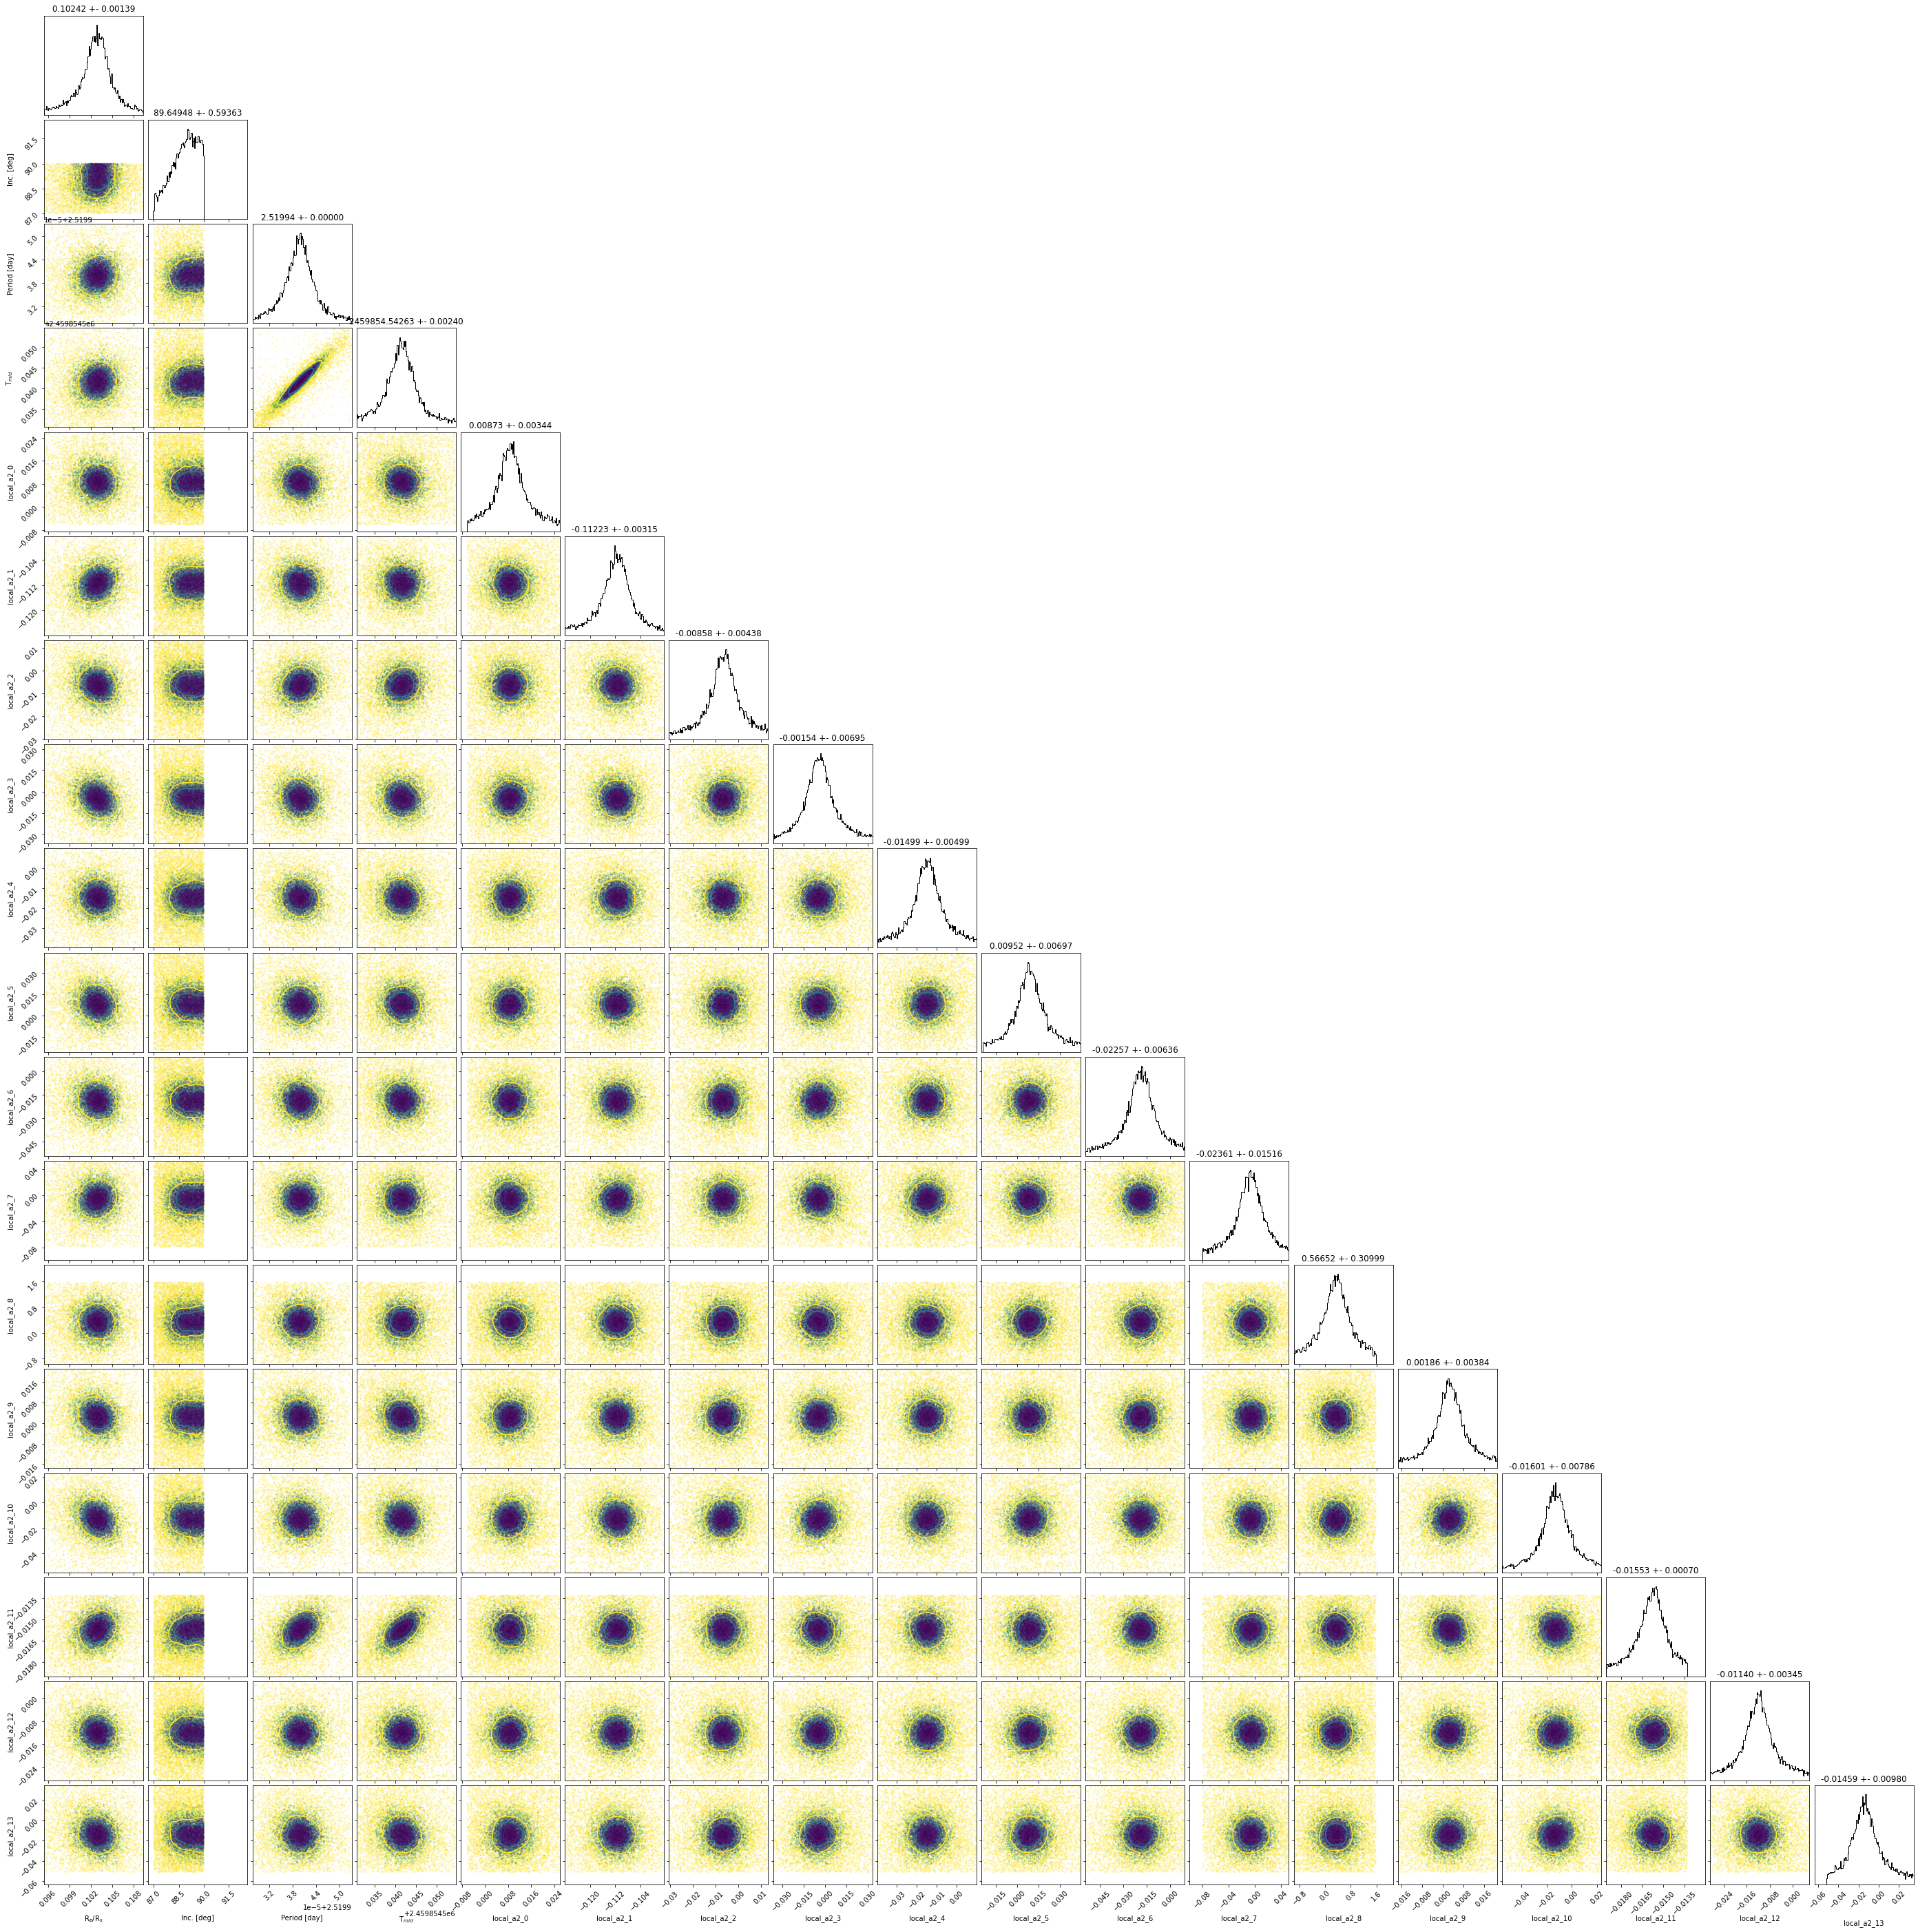

In [20]:
myfit.plot_triangle()
plt.savefig("posteriors.png",facecolor='white')

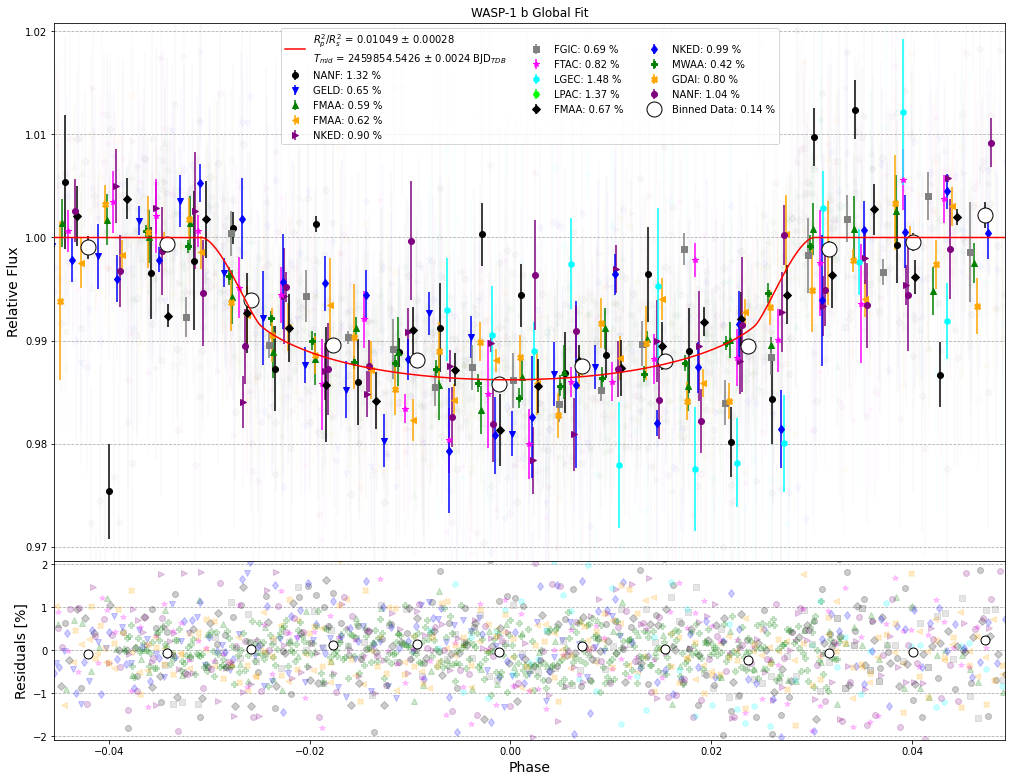

In [21]:
myfit.plot_bestfit(alpha=0.025, bin_dt = 15./60/24, title="WASP-1 b Global Fit",phase_limits='median')
plt.savefig("bestfit.png",facecolor='white')

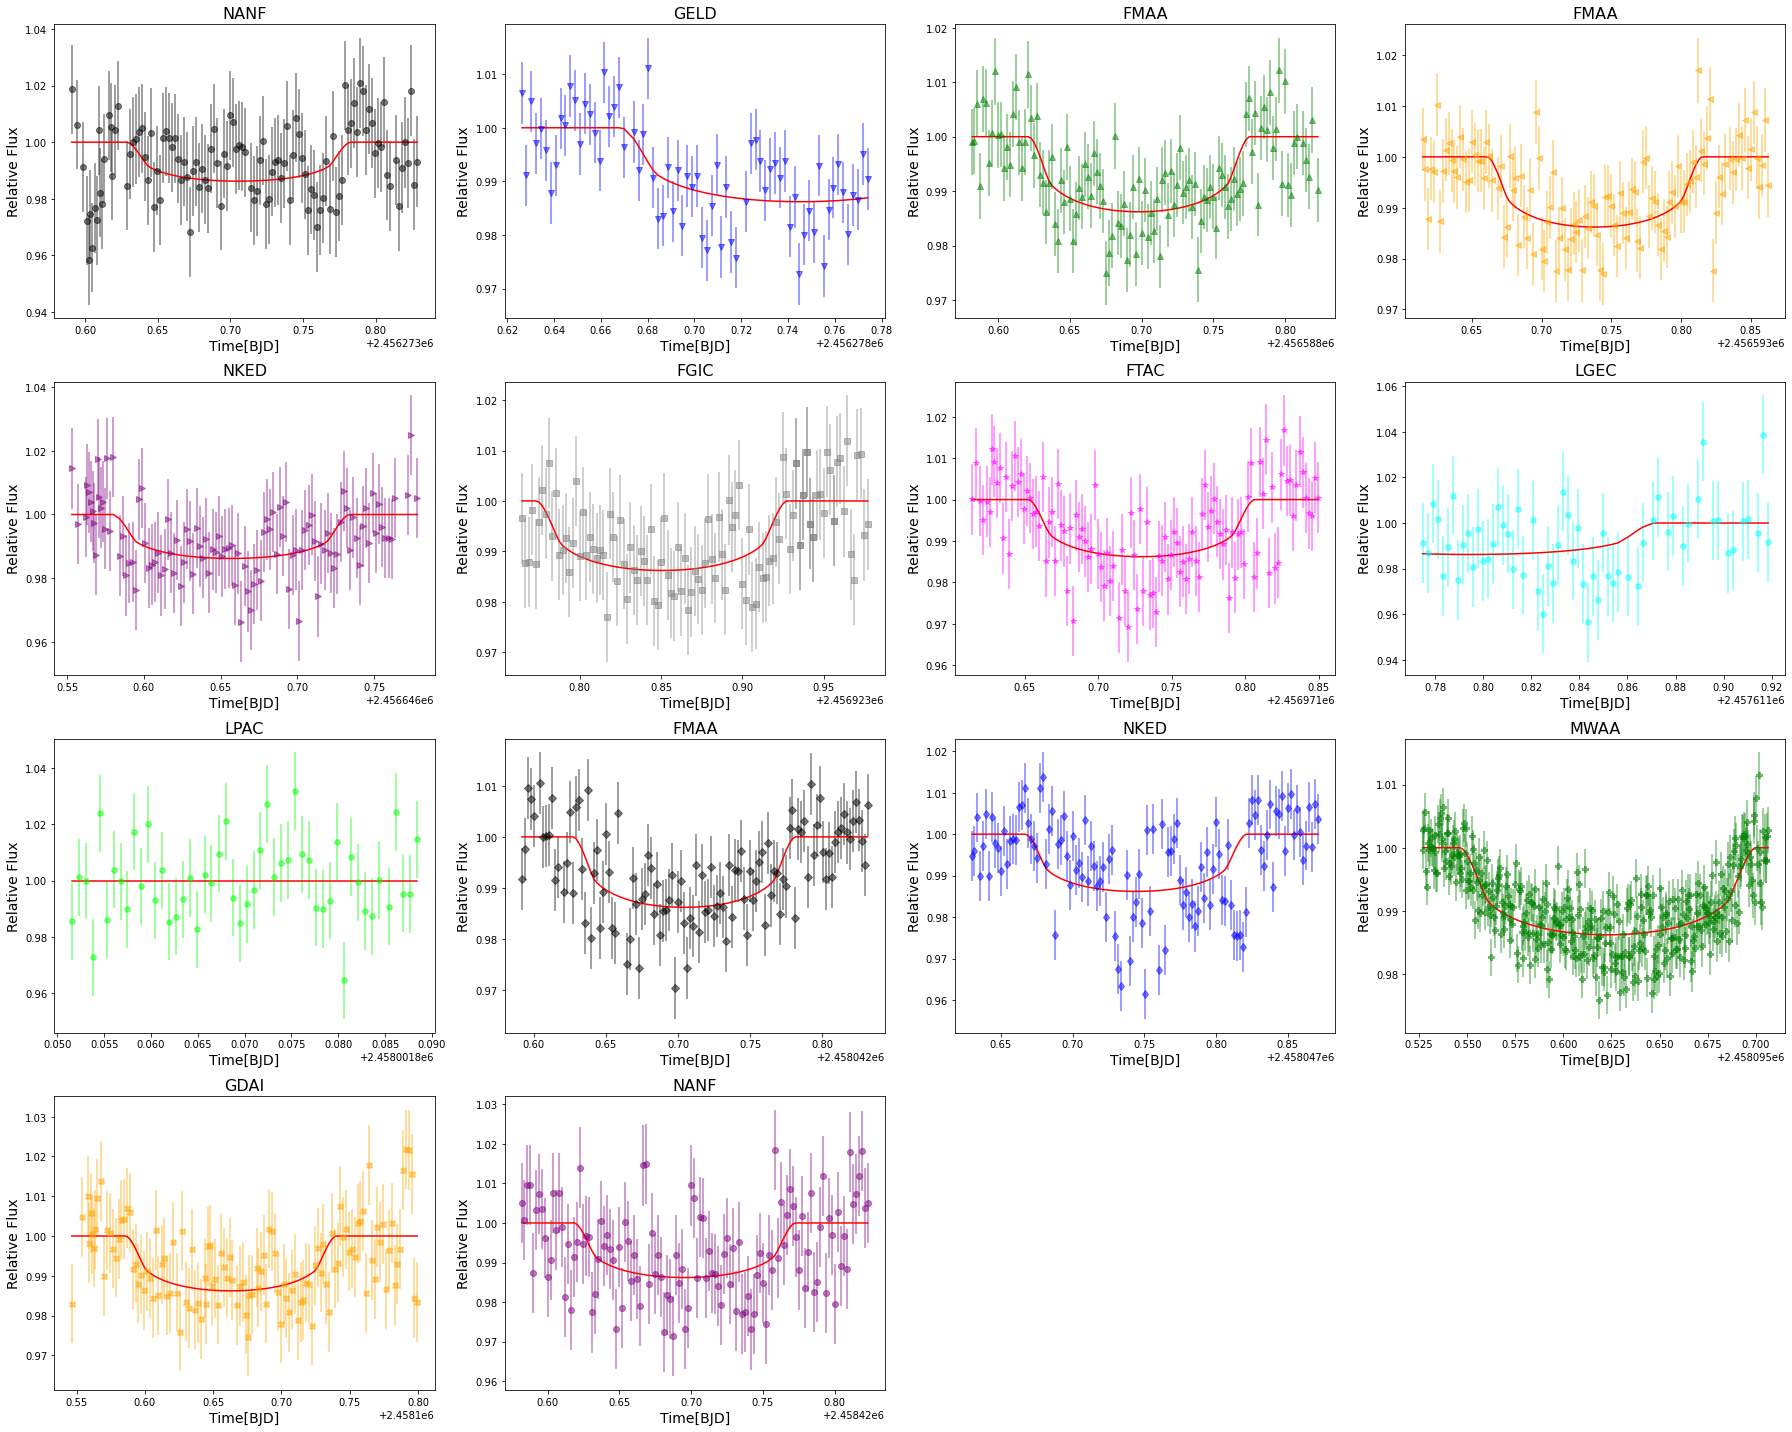

In [18]:
myfit.plot_bestfits()
plt.savefig("bestfits.png",facecolor='white')

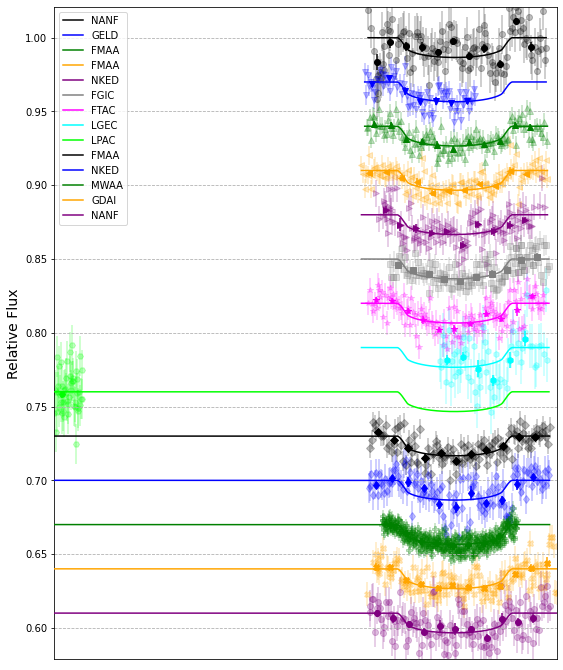

In [19]:
myfit.plot_stack(dy=0.03)
plt.savefig("stackfit.png",facecolor='white')